<a href="https://colab.research.google.com/github/kidujm/Growth-Strategy-Data/blob/main/20260223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터프레임 표로 출력해보기

In [1]:
import pandas as pd

# 1. 데이터 리스트 생성 (이미지 내용 기반)
data = {
    "입점 유형": [
        "롯데백화점",
        "롯데마트",
        "롯데몰 / 아울렛",
        "계열사 입점 소계",
        "기타(일반/위탁)",
        "전체 합계"
    ],
    "지점 수": ["31개", "11개", "18개", "60개", "70개", "130개"],
    "전체 대비 비율 (%)": ["약 23.8%", "약 8.5%", "약 13.8%", "약 46.2%", "약 53.8%", "100%"],
    "주요 입점 지역": [
        "서울(9), 경기(9), 부산/영남(10) 등",
        "서초, 금천, 안산고잔, 대구율하 등",
        "월드타워, 김포공항, 수지, 기흥 등",
        "표에 기재된 주요 핵심 지점 합계",
        "홍대입구, 합정, 신림 등 일반 상가",
        "2026년 상반기 운영 기준"
    ]
}

# 2. 데이터프레임 생성
df = pd.DataFrame(data)

# 3. 데이터프레임 출력
print("--- [롯데시네마 계열사 입점 통계 보고서] ---")
print(df)

# 4. CSV 파일로 저장 (한글 깨짐 방지를 위해 utf-8-sig 사용)
file_name = "lotte_cinema_stats_2026.csv"
df.to_csv(file_name, index=False, encoding="utf-8-sig")

print(f"\n성공적으로 '{file_name}' 파일이 생성되었습니다.")

--- [롯데시네마 계열사 입점 통계 보고서] ---
       입점 유형  지점 수 전체 대비 비율 (%)                   주요 입점 지역
0      롯데백화점   31개      약 23.8%  서울(9), 경기(9), 부산/영남(10) 등
1       롯데마트   11개       약 8.5%       서초, 금천, 안산고잔, 대구율하 등
2  롯데몰 / 아울렛   18개      약 13.8%       월드타워, 김포공항, 수지, 기흥 등
3  계열사 입점 소계   60개      약 46.2%         표에 기재된 주요 핵심 지점 합계
4  기타(일반/위탁)   70개      약 53.8%       홍대입구, 합정, 신림 등 일반 상가
5      전체 합계  130개         100%            2026년 상반기 운영 기준

성공적으로 'lotte_cinema_stats_2026.csv' 파일이 생성되었습니다.


In [2]:
# 데이터정제
# [정제 1] '지점 수' 컬럼에서 '개'를 제거하고 숫자로 변환
# '31개' -> 31 (int)
df['지점 수'] = df['지점 수'].str.replace('개', '', regex=False).astype(int)


In [3]:
# [정제 2] '비율' 컬럼에서 '약'과 '%'를 제거하고 숫자로 변환
# '약 23.8%' -> 23.8 (float)
df['전체 대비 비율 (%)'] = df['전체 대비 비율 (%)'].str.replace('약 ', '', regex=False).str.replace('%', '', regex=False).astype(float)

In [4]:
# 3. 결과 확인
print(df.info()) # 데이터 타입이 int64, float64로 변한 것을 확인
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   입점 유형         6 non-null      object 
 1   지점 수          6 non-null      int64  
 2   전체 대비 비율 (%)  6 non-null      float64
 3   주요 입점 지역      6 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 324.0+ bytes
None
       입점 유형  지점 수  전체 대비 비율 (%)                   주요 입점 지역
0      롯데백화점    31          23.8  서울(9), 경기(9), 부산/영남(10) 등
1       롯데마트    11           8.5       서초, 금천, 안산고잔, 대구율하 등
2  롯데몰 / 아울렛    18          13.8       월드타워, 김포공항, 수지, 기흥 등
3  계열사 입점 소계    60          46.2         표에 기재된 주요 핵심 지점 합계
4  기타(일반/위탁)    70          53.8       홍대입구, 합정, 신림 등 일반 상가
5      전체 합계   130         100.0            2026년 상반기 운영 기준


In [6]:

df.to_csv("cleaned_lotte_cinema_stats.csv", index=False, encoding="utf-8-sig")

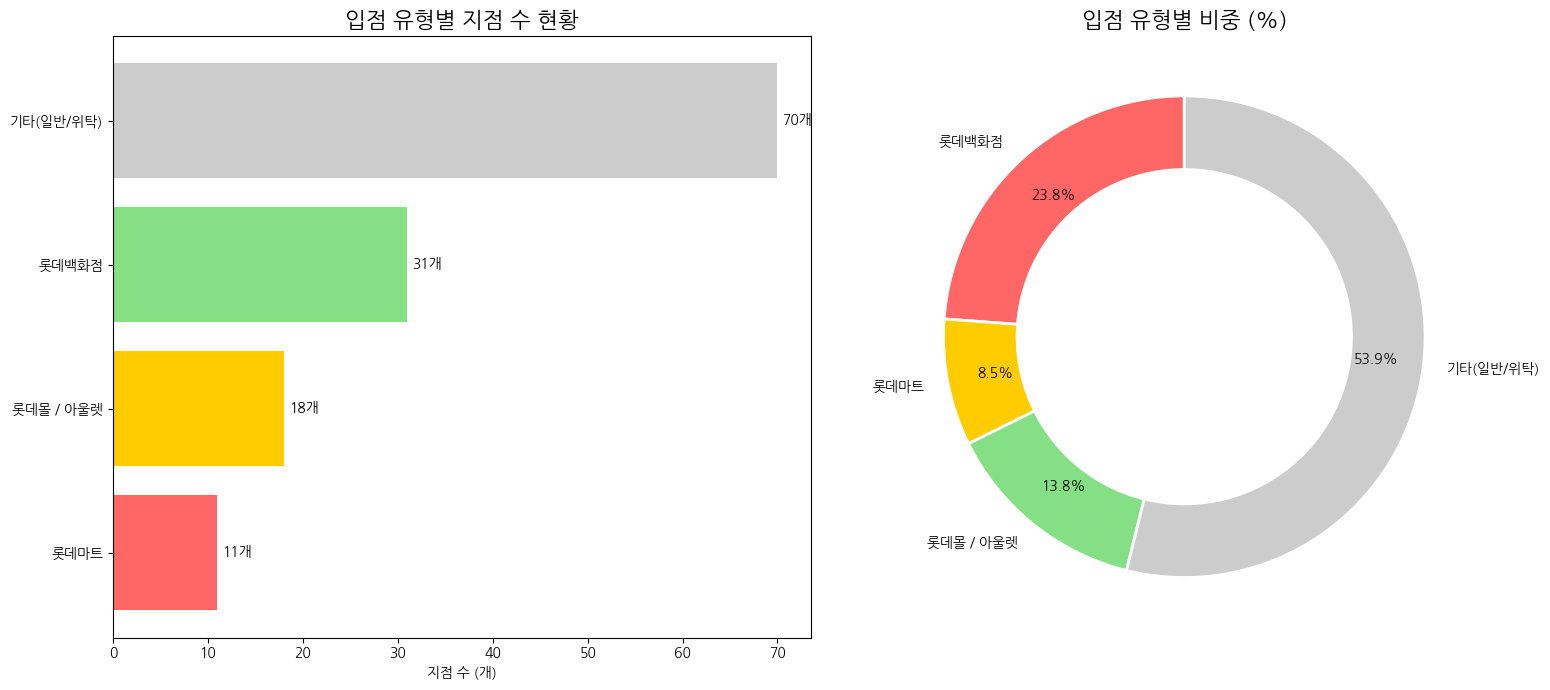

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 1. 한글 폰트 설정 (OS별 자동 설정)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: # Linux (Colab, Docker 등)
    # 나눔고딕 등 설치된 한글 폰트 설정
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 2. 데이터 준비 (합계 제외 개별 항목만 사용)
data = {
    "입점 유형": ["롯데백화점", "롯데마트", "롯데몰 / 아울렛", "기타(일반/위탁)"],
    "지점 수": [31, 11, 18, 70],
    "비율 (%)": [23.8, 8.5, 13.8, 53.8]
}
df = pd.DataFrame(data)

# 3. 시각화 (가로 바 차트와 도넛 차트)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
colors = ['#ff6666', '#ffcc00', '#85e085', '#cccccc'] # 브랜드 컬러 반영

# [그래프 1] 가로 바 차트 (지점 수)
df_sorted = df.sort_values(by="지점 수", ascending=True)
bars = ax1.barh(df_sorted['입점 유형'], df_sorted['지점 수'], color=colors)
ax1.set_title('입점 유형별 지점 수 현황', fontsize=16, fontweight='bold')
ax1.set_xlabel('지점 수 (개)')

# 바 차트 옆에 숫자 표시
for bar in bars:
    ax1.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}개', va='center')

# [그래프 2] 도넛 차트 (비중)
ax2.pie(df['비율 (%)'], labels=df['입점 유형'], autopct='%1.1f%%',
        startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2},
        pctdistance=0.8)

# 도넛 형태를 위한 중앙 원 그리기
centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax2.add_artist(centre_circle)
ax2.set_title('입점 유형별 비중 (%)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show() # 또는 plt.savefig('result.png')

In [8]:
import pandas as pd
import numpy as np

# Install Korean font
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Configure Matplotlib to use NanumGothic
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # To prevent breaking minus sign

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (4,103 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and direc

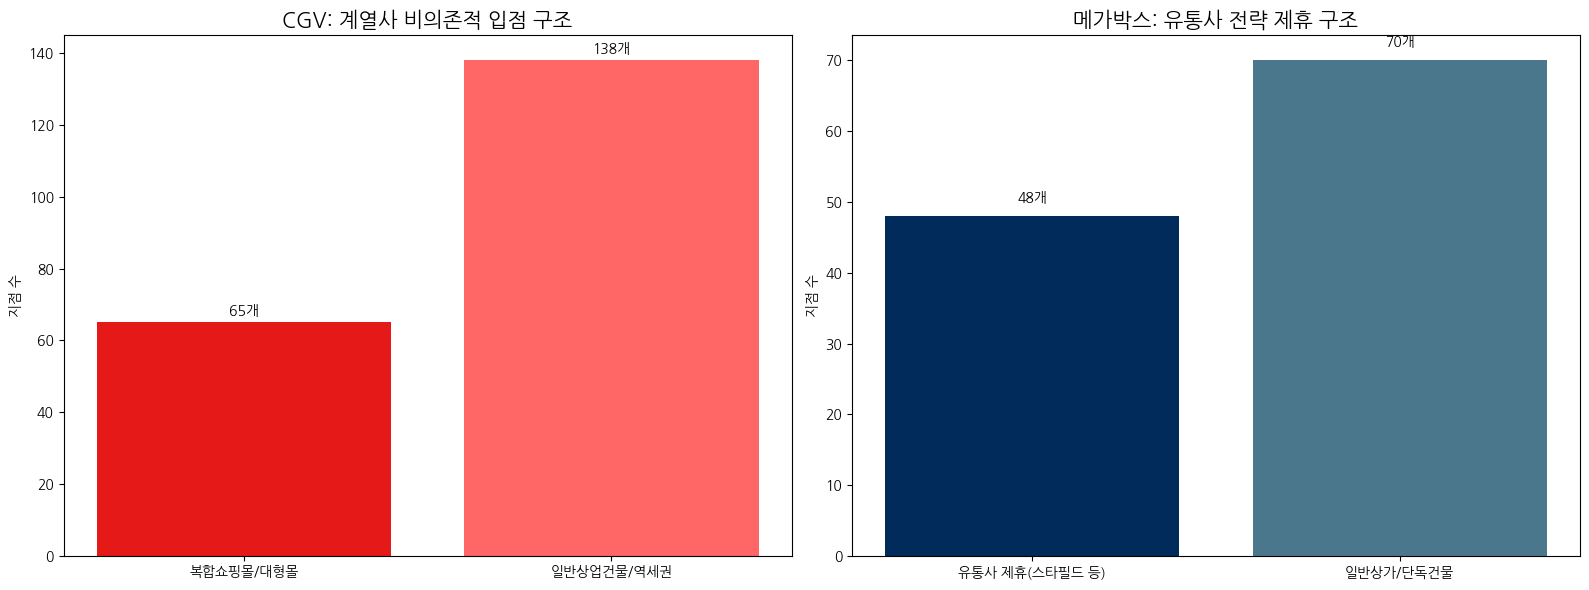

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 1. 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

# 2. 데이터프레임 생성
# CGV 데이터
cgv_data = {
    '브랜드': ['CGV', 'CGV'],
    '입점유형': ['복합쇼핑몰/대형몰', '일반상업건물/역세권'],
    '지점수': [65, 138]
}

# 메가박스 데이터
mega_data = {
    '브랜드': ['메가박스', '메가박스'],
    '입점유형': ['유통사 제휴(스타필드 등)', '일반상가/단독건물'],
    '지점수': [48, 70]
}

df_cgv = pd.DataFrame(cgv_data)
df_mega = pd.DataFrame(mega_data)

# 3. 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# CGV 그래프
colors_cgv = ['#e61919', '#ff6666']
ax1.bar(df_cgv['입점유형'], df_cgv['지점수'], color=colors_cgv)
ax1.set_title('CGV: 계열사 비의존적 입점 구조', fontsize=15, fontweight='bold')
ax1.set_ylabel('지점 수')
for i, v in enumerate(df_cgv['지점수']):
    ax1.text(i, v + 2, f'{v}개', ha='center', fontweight='bold')

# 메가박스 그래프
colors_mega = ['#002b5b', '#4b778d']
ax2.bar(df_mega['입점유형'], df_mega['지점수'], color=colors_mega)
ax2.set_title('메가박스: 유통사 전략 제휴 구조', fontsize=15, fontweight='bold')
ax2.set_ylabel('지점 수')
for i, v in enumerate(df_mega['지점수']):
    ax2.text(i, v + 2, f'{v}개', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

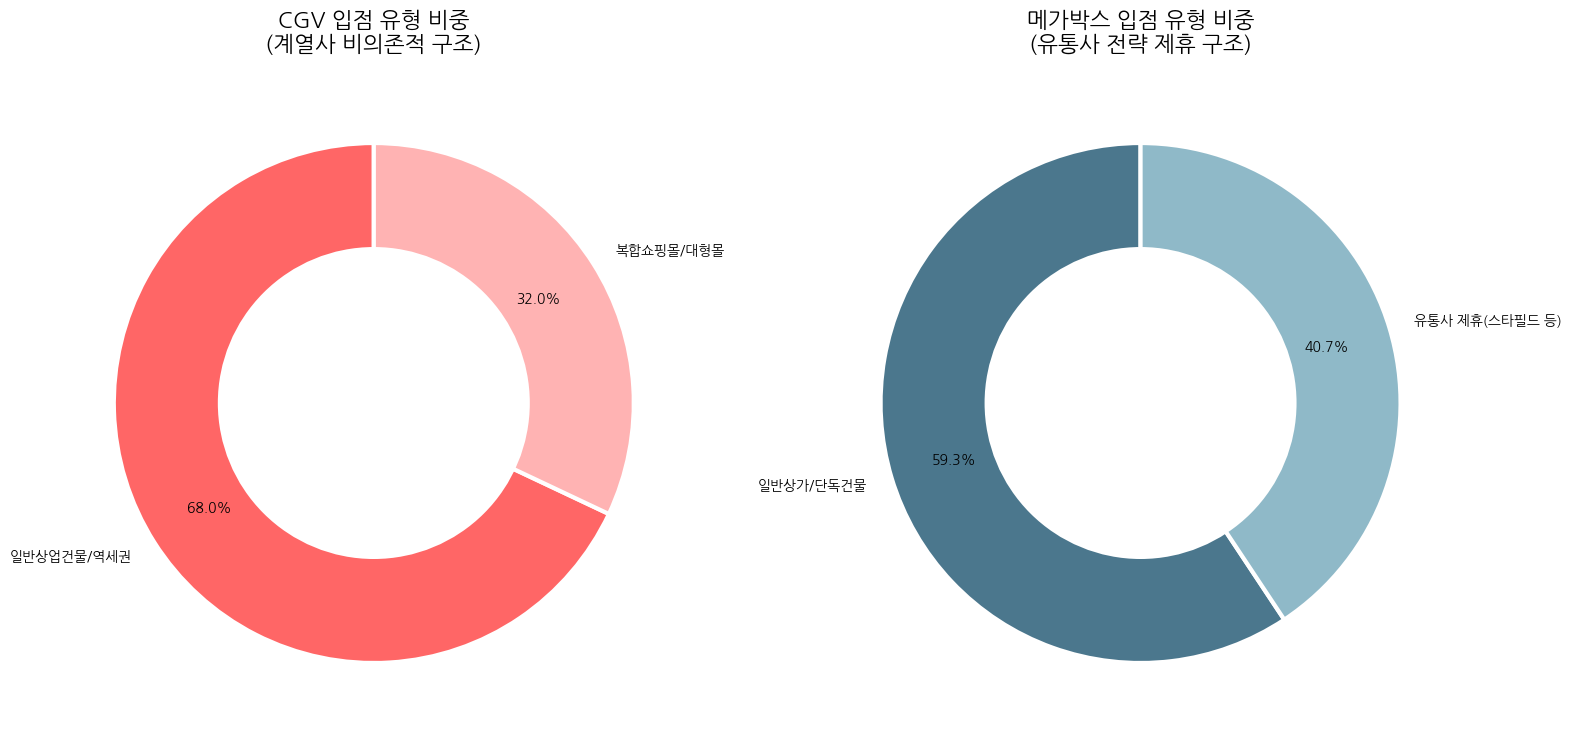

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 1. 한글 폰트 설정 (OS별 자동 설정)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 준비
# CGV 데이터 (전체 203개 기준)
cgv_labels = ['일반상업건물/역세권', '복합쇼핑몰/대형몰']
cgv_sizes = [138, 65] # 약 68%, 32%

# 메가박스 데이터 (전체 118개 기준)
mega_labels = ['일반상가/단독건물', '유통사 제휴(스타필드 등)']
mega_sizes = [70, 48] # 약 59%, 41%

# 3. 시각화 (도넛 차트)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# [좌측: CGV 도넛 차트]
colors_cgv = ['#ff6666', '#ffb3b3']
ax1.pie(cgv_sizes, labels=cgv_labels, autopct='%1.1f%%', startangle=90,
        colors=colors_cgv, wedgeprops={'edgecolor': 'white', 'linewidth': 3}, pctdistance=0.75)
# 도넛 구멍 생성
centre_circle_cgv = plt.Circle((0,0), 0.60, fc='white')
ax1.add_artist(centre_circle_cgv)
ax1.set_title('CGV 입점 유형 비중\n(계열사 비의존적 구조)', fontsize=16, fontweight='bold', pad=20)

# [우측: 메가박스 도넛 차트]
colors_mega = ['#4b778d', '#8fb9c8']
ax2.pie(mega_sizes, labels=mega_labels, autopct='%1.1f%%', startangle=90,
        colors=colors_mega, wedgeprops={'edgecolor': 'white', 'linewidth': 3}, pctdistance=0.75)
# 도넛 구멍 생성
centre_circle_mega = plt.Circle((0,0), 0.60, fc='white')
ax2.add_artist(centre_circle_mega)
ax2.set_title('메가박스 입점 유형 비중\n(유통사 전략 제휴 구조)', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# 데이터분석 결과
## 1. CGV의 '자생적 파워' 입증

- 분석: CGV는 대규모 계열 유통망 없이도 일반 상업건물 비중(약 68%)이 압도적으로 높습니다. 이는 특정 유통 시설의 집객력에 기대지 않고, 'CGV'라는 브랜드 자체가 목적지가 되는 자생적 집객력을 갖췄음을 의미합니다.

- 마케팅 강점: 특정 쇼핑몰의 영업시간이나 정책에 구애받지 않는 단독 마케팅 및 심야 상영 활성화에 유리합니다.

## 2. 메가박스의 '기생적 우위' 전략

- 분석: 메가박스는 전체 지점의 약 40% 이상이 신세계(스타필드), 현대백화점 등 유통 대기업의 인프라와 결합되어 있습니다.

- 마케팅 강점: 자체 유통망이 없는 한계를 **'가장 핫한 복합문화공간 입점'**으로 해결했습니다. 스타필드와 같은 대형 몰 방문객을 그대로 흡수함으로써, 마케팅 비용을 효율적으로 집행하면서도 '프리미엄' 이미지를 획득하는 스마트한 전략입니다.

## 3. 롯데시네마와의 결정적 차이

- 롯데시네마는 '그룹 시너지'를 통한 안정적 입점(공급자 중심)인 반면, CGV는 '상권 분석을 통한 입지 선점(수요자 중심)', 메가박스는 '외부 파트너십을 통한 효율 극대화(전략 중심)'로 요약할 수 있습니다.

## 마케팅 인사이트 도출
# [분석 보고서] 멀티플렉스 3사 입점 전략 및 IT 기기 마케팅 인사이트

## 1. 멀티플렉스 3사 점유 및 입점 전략 비교

| 브랜드 | 운영 주체 | 입점 핵심 전략 | 마케팅 포지셔닝 |
| :--- | :--- | :--- | :--- |
| **롯데시네마** | 롯데쇼핑 | **계열사 시너지 (46.2%)**: 백화점, 마트, 몰 중심 입점 | 일상 밀착형 라이프스타일 플랫폼 |
| **CGV** | CJ CGV | **독자적 랜드마크 (68.0%)**: 주요 상권 및 역세권 직접 선점 | 브랜드 파워 기반 데스티네이션 마케팅 |
| **메가박스** | 콘텐트리중앙 | **전략적 제휴 (41.0%)**: 스타필드, 현대아울렛 등 외부 제휴 | 프리미엄 이미지 및 효율적 인프라 공유 |

### **[핵심 인사이트]**
* **롯데시네마**: 유통 계열사와 결합된 동선을 활용하여 **'쇼핑 중 휴식'**이라는 낮은 진입장벽의 마케팅이 유리함. L-POINT 기반 구매 이력 타겟팅이 핵심 자산임.
* **CGV**: 계열사 의존도가 낮고 일반 상업지구 비중이 높으므로, **독점 콘텐츠(중계권 등)와 특화관(IMAX 등)**을 통해 '어디에 있든 찾아오게 만드는' 전략이 유효함.
* **메가박스**: 대형 복합몰 입점 비중이 높으므로, 고관여 소비자를 타겟으로 한 **'세련된 도심 여가'** 이미지와 프리미엄 기술관 마케팅에 집중해야 함.

---

## 2. 지역별 로컬라이징 방어 및 공격 전략

### **가. 부산/경상권 (정서적 충성도 활용)**
* **현황**: 롯데시네마가 핵심 상권 백화점을 장악 중이나, KBO 중계권은 CGV가 선점함.
* **전략**: 중계권 부재를 우회하기 위해 **구단 IP(롯데 자이언츠)를 활용한 오프라인 이벤트 및 굿즈**에 집중.

### **나. 경기/인천권 (몰 스테이 경쟁)**
* **현황**: 신도시 복합 쇼핑몰(스타필드 vs 롯데몰) 간의 점유율 경쟁 구도.
* **전략**: 메가박스의 프리미엄 이미지에 맞서, **'무료 주차 시간 확대'와 '마트 연계 장보기 패키지'** 등 실질적 편의 혜택 강화.


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
